# Cleaning US Census Data

You just got hired as a Data Analyst at the Census Bureau, which collects census data and creates interesting visualizations and insights from it.

The person who had your job before you left you all the data they had for the most recent census. It is in multiple `csv` files. They didn't use pandas, they would just look through these `csv` files manually whenever they wanted to find something. Sometimes they would copy and paste certain numbers into Excel to make charts.

The thought of it makes you shiver. This is not scalable or repeatable.

Your boss wants you to make some scatterplots and histograms by the end of the day. Can you get this data into `pandas` and into reasonable shape so that you can make these histograms?

## Inspect the Data!

1. The first visualization your boss wants you to make is a scatterplot that shows average income in a state vs proportion of women in that state.

   Open some of the census `csv` files that came with the kit you downloaded. How are they named? What kind of information do they hold? Will they help us make this graph?

In [22]:
with open('states0.csv') as states0:
  contents = states0.read()
print(contents)

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,"$43,296.36 ",2341093M_2489527F
1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,"$70,354.74 ",384160M_349215F
2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,"$54,207.82 ",3299088M_3342840F
3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,"$41,935.63 ",1451913M_1506295F
4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,"$67,264.78 ",19087135M_19334329F
5,Colorado,5278906,20.78%,69.90%,3.55%,0.57%,2.66%,,"$64,657.80 ",2648667M_2630239F



2. It will be easier to inspect this data once we have it in a DataFrame. You can't even call `.head()` on these `csv`s! How are you supposed to read them?

   Using `glob`, loop through the census files available and load them into DataFrames. Then, concatenate all of those DataFrames together into one DataFrame, called something like `us_census`.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

files = glob.glob('states*.csv')

files_list = []
for file in files:
    data = pd.read_csv(file)
    files_list.append(data)
    
us_census = pd.concat(files_list)

3. Look at the `.columns` and the `.dtypes` of the `us_census` DataFrame. Are those datatypes going to hinder you as you try to make histograms?

In [24]:
print(us_census.columns)
print(us_census.dtypes)



Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')
Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object


4. Look at the `head()` of the DataFrame so that you can understand why some of these `dtypes` are objects instead of integers or floats.

   Start to make a plan for how to convert these columns into the right types for manipulation.

In [25]:
print(us_census.head())

   Unnamed: 0       State  TotalPop Hispanic   White   Black  Native   Asian  \
0           0     Alabama   4830620    3.75%  61.88%  31.25%   0.45%   1.05%   
1           1      Alaska    733375    5.91%  60.91%   2.85%  16.39%   5.45%   
2           2     Arizona   6641928   29.57%  57.12%   3.85%   4.36%   2.88%   
3           3    Arkansas   2958208    6.22%  71.14%  18.97%   0.52%   1.14%   
4           4  California  38421464   37.29%  40.22%   5.68%   0.41%  13.05%   

  Pacific       Income            GenderPop  
0   0.03%  $43,296.36     2341093M_2489527F  
1   1.06%  $70,354.74       384160M_349215F  
2   0.17%  $54,207.82     3299088M_3342840F  
3   0.15%  $41,935.63     1451913M_1506295F  
4   0.35%  $67,264.78   19087135M_19334329F  


## Regex to the Rescue

5. Use regex to turn the `Income` column into a format that is ready for conversion into a numerical type.

In [26]:
us_census.Income = us_census['Income'].replace('[\$,]', '', regex=True)

6. Look at the `GenderPop` column. We are going to want to separate this into two columns, the `Men` column, and the `Women` column.

   Split the column into those two new columns using `str.split` and separating out those results.

In [27]:
gender_split = us_census.GenderPop.str.split("_")
us_census['Male'] = gender_split.str.get(0)
us_census['Female'] = gender_split.str.get(1)

# print(us_census.head())

us_census = us_census[["Unnamed: 0", "State", "TotalPop", "Income", "Male", "Female", "Hispanic", "White", "Black", "Native", "Asian", "Pacific"]]
# print(us_census.head())

us_census.Male = us_census['Male'].replace('[M]', " ", regex=True)
us_census.Female = us_census['Female'].replace('[F]', " ", regex=True)
us_census.head()

,Unnamed: 0,State,TotalPop,Income,Male,Female,Hispanic,White,Black,Native,Asian,Pacific
0,0,Alabama,4830620,43296.36,2341093,2489527,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%
1,1,Alaska,733375,70354.74,384160,349215,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%
2,2,Arizona,6641928,54207.82,3299088,3342840,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%
3,3,Arkansas,2958208,41935.63,1451913,1506295,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%
4,4,California,38421464,67264.78,19087135,19334329,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%


7. Convert both of the columns into numerical datatypes.

   There is still an `M` or an `F` character in each entry! We should remove those before we convert.

In [28]:
us_census.Male = pd.to_numeric(us_census.Male, errors='coerce')
us_census.Female = pd.to_numeric(us_census.Female, errors='coerce')
us_census.Income = pd.to_numeric(us_census.Income)
print(us_census.dtypes)

Unnamed: 0      int64
State          object
TotalPop        int64
Income        float64
Male            int64
Female        float64
Hispanic       object
White          object
Black          object
Native         object
Asian          object
Pacific        object
dtype: object


8. Now you should have the columns you need to make the graph and make sure your boss does not slam a ruler angrily on your desk because you've wasted your whole day cleaning your data with no results to show!

   Use matplotlib to make a scatterplot!
   
   ```py
   plt.scatter(the_women_column, the_income_column)
   ```
   
   Remember to call `plt.show()` to see the graph!

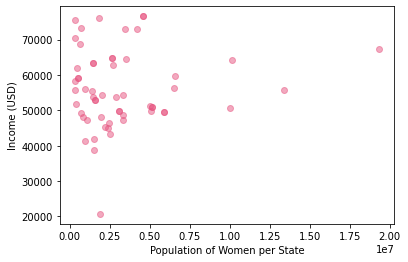

<Figure size 432x288 with 0 Axes>

In [29]:
plt.scatter(us_census.Female, us_census.Income, color='#e75480', alpha=0.5)
# plt.scatter(us_census.Male, us_census.Income, color='#88c999')
plt.xlabel("Population of Women per State")
plt.ylabel("Income (USD)")
plt.show()
plt.clf()


9. You want to double check your work. You know from experience that these monstrous csv files probably have `nan` values in them! Print out your column with the number of women per state to see.

   We can fill in those `nan`s by using pandas' `.fillna()` function.
   
   You have the `TotalPop` per state, and you have the `Men` per state. As an estimate for the `nan` values in the `Women` column, you could use the `TotalPop` of that state minus the `Men` for that state.
   
   Print out the `Women` column after filling the `nan` values to see if it worked!

In [30]:
print(us_census[us_census['Female'].isna()])

us_census['Female'] = us_census['Female'].fillna(us_census['TotalPop']-us_census['Male'])

print(us_census)


   Unnamed: 0     State  TotalPop    Income     Male  Female Hispanic   White  \
5           5  Maryland   5930538  78765.40  2872643     NaN    8.47%  52.68%   
0           0  Maryland   5930538  78765.40  2872643     NaN    8.47%  52.68%   
1           1   Montana   1014699  47645.68   510163     NaN    3.27%  86.42%   

    Black Native  Asian Pacific  
5  30.68%  0.20%  5.33%   0.04%  
0  30.68%  0.20%  5.33%   0.04%  
1   0.43%  7.06%  0.57%   0.07%  
   Unnamed: 0                 State  TotalPop    Income      Male      Female  \
0           0               Alabama   4830620  43296.36   2341093   2489527.0   
1           1                Alaska    733375  70354.74    384160    349215.0   
2           2               Arizona   6641928  54207.82   3299088   3342840.0   
3           3              Arkansas   2958208  41935.63   1451913   1506295.0   
4           4            California  38421464  67264.78  19087135  19334329.0   
5           5              Colorado   5278906  64657.

10. We forgot to check for duplicates! Use `.duplicated()` on your `census` DataFrame to see if we have duplicate rows in there.

In [31]:
#duplicates = us_census.duplicated(subset=['State', 'TotalPop'])
duplicated = us_census.duplicated(subset='State')
# print(duplicates.value_counts())
# print(duplicates)
print(duplicated.value_counts())

# Extract duplicate rows
us_census.loc[us_census.duplicated(subset=['State', 'TotalPop']), :]



False    51
True      9
dtype: int64


,Unnamed: 0,State,TotalPop,Income,Male,Female,Hispanic,White,Black,Native,Asian,Pacific
0,0,Colorado,5278906,64657.80,2648667,2630239.0,20.78%,69.90%,3.55%,0.57%,2.66%,NaN
0,0,Georgia,10006693,50811.08,4883331,5123362.0,8.42%,54.29%,32.09%,0.19%,3.10%,0.05%
0,0,Iowa,3093526,53017.75,1534595,1558931.0,5.30%,87.72%,3.26%,0.29%,1.70%,0.06%
0,0,Maryland,5930538,78765.40,2872643,3057895.0,8.47%,52.68%,30.68%,0.20%,5.33%,0.04%
0,0,Missouri,6045448,49763.99,2964003,3081445.0,4.04%,77.51%,14.12%,0.36%,1.62%,0.10%
0,0,New Jersey,8904413,76581.08,4343027,4561386.0,18.75%,56.49%,14.39%,0.12%,8.16%,0.03%
0,0,Ohio,11575977,49655.25,5662893,5913084.0,3.67%,75.90%,16.21%,0.17%,1.62%,0.02%
0,0,Rhode Island,1053661,59125.27,510388,543273.0,13.36%,74.33%,5.68%,0.35%,3.25%,0.04%
0,0,Utah,2903379,63488.92,1459229,1444150.0,13.47%,79.41%,1.02%,1.08%,2.20%,0.83%


11. Drop those duplicates using the `.drop_duplicates()` function.

In [32]:
us_census = us_census.drop_duplicates(subset=['State', 'TotalPop'])
# print(us_census.duplicated().value_counts())
print(us_census)




   Unnamed: 0                 State  TotalPop    Income      Male      Female  \
0           0               Alabama   4830620  43296.36   2341093   2489527.0   
1           1                Alaska    733375  70354.74    384160    349215.0   
2           2               Arizona   6641928  54207.82   3299088   3342840.0   
3           3              Arkansas   2958208  41935.63   1451913   1506295.0   
4           4            California  38421464  67264.78  19087135  19334329.0   
5           5              Colorado   5278906  64657.80   2648667   2630239.0   
1           1           Connecticut   3593222  76146.56   1751607   1841615.0   
2           2              Delaware    926454  61827.98    448413    478041.0   
3           3  District of Columbia    647484  75466.36    306674    340810.0   
4           4               Florida  19645772  50690.19   9600009  10045763.0   
5           5               Georgia  10006693  50811.08   4883331   5123362.0   
1           1               

12. Make the scatterplot again. Now, it should be perfect! Your job is secure, for now.

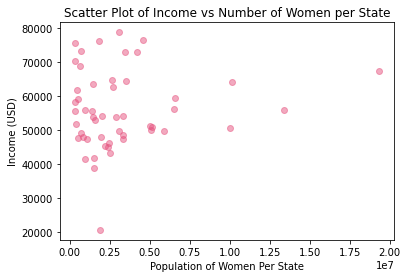

In [33]:
plt.scatter(us_census.Female, us_census.Income, color='#e75480', alpha=0.5)
#plt.scatter(us_census.Male, us_census.Income, color='#88c999')
plt.title('Scatter Plot of Income vs Number of Women per State')
plt.xlabel("Population of Women Per State")
plt.ylabel("Income (USD)")

plt.show()

## Histogram of Races

13. Now your boss wants you to make a bunch of histograms out of the race data that you have. Look at the `.columns` again to see what the race categories are.

In [34]:
print(us_census.columns)



Index(['Unnamed: 0', 'State', 'TotalPop', 'Income', 'Male', 'Female',
       'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific'],
      dtype='object')


14. Try to make a histogram for each one!

    You will have to get the columns into the numerical format, and those percentage signs will have to go.
    
    Don't forget to fill the `nan` values with something that makes sense! You probably dropped the duplicate rows when making your last graph, but it couldn't hurt to check for duplicates again.

In [35]:
# print(us_census.Asian.dtype) -object
# race_columns = 'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific'

# print(us_census[{'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific'}])

us_census.Hispanic = us_census['Hispanic'].replace('[\%,]', " ", regex=True)
us_census.White = us_census['White'].replace('[\%,]', " ", regex=True)
us_census.Black = us_census['Black'].replace('[\%,]', " ", regex=True)
us_census.Native = us_census['Native'].replace('[\%,]', " ", regex=True)
us_census.Asian = us_census['Asian'].replace('[\%,]', " ", regex=True)
us_census.Pacific = us_census['Pacific'].replace('[\%,]', " ", regex=True)

us_census.Hispanic = pd.to_numeric(us_census.Hispanic)
us_census.White = pd.to_numeric(us_census.White)
us_census.Black = pd.to_numeric(us_census.Black)
us_census.Native = pd.to_numeric(us_census.Native)
us_census.Asian = pd.to_numeric(us_census.Asian)
us_census.Pacific = pd.to_numeric(us_census.Pacific)

us_census['Race_Total2'] = us_census.Hispanic + us_census.White + us_census.Black + us_census.Native + us_census.Asian + us_census.Pacific
# print(us_census[{'State', 'Race_Total2'}])
# print(us_census.Race_Total.median()) - 97.96

us_census['Race_Total'] = us_census[['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']].sum(axis=1)
us_census[{'State', 'Race_Total', 'Race_Total2'}]

us_census['Race_Total'].mean() #97.33019607843136

#us_census['Pacific'] = us_census['Pacific'].fillna(98 - us_census.Hispanic - us_census.Black - us_census.White - us_census.Native - us_census.Asian)

97.33019607843136

In [37]:
race_is_null = us_census.isna()
selected_rows = us_census[us_census['Pacific'].isna()]
#print(selected_rows) 
# 97.96

us_census['Pacific'] = us_census['Pacific'].fillna(98 - us_census.Hispanic - us_census.Black - us_census.White - us_census.Native - us_census.Asian)
us_census

,Unnamed: 0,State,TotalPop,Income,Male,Female,Hispanic,White,Black,Native,Asian,Pacific,Race_Total2,Race_Total
0,0,Alabama,4830620,43296.36,2341093,2489527.0,3.75,61.88,31.25,0.45,1.05,0.03,98.41,98.41
1,1,Alaska,733375,70354.74,384160,349215.0,5.91,60.91,2.85,16.39,5.45,1.06,92.57,92.57
2,2,Arizona,6641928,54207.82,3299088,3342840.0,29.57,57.12,3.85,4.36,2.88,0.17,97.95,97.95
3,3,Arkansas,2958208,41935.63,1451913,1506295.0,6.22,71.14,18.97,0.52,1.14,0.15,98.14,98.14
4,4,California,38421464,67264.78,19087135,19334329.0,37.29,40.22,5.68,0.41,13.05,0.35,97.00,97.00
5,5,Colorado,5278906,64657.80,2648667,2630239.0,20.78,69.90,3.55,0.57,2.66,0.50,NaN,97.46
1,1,Connecticut,3593222,76146.56,1751607,1841615.0,15.60,67.68,10.35,0.13,4.02,0.02,97.80,97.80
2,2,Delaware,926454,61827.98,448413,478041.0,8.82,64.63,20.74,0.26,3.27,0.24,NaN,97.72
3,3,District of Columbia,647484,75466.36,306674,340810.0,9.17,33.10,51.78,0.20,3.38,0.03,97.66,97.66
4,4,Florida,19645772,50690.19,9600009,10045763.0,21.34,59.08,15.17,0.21,2.28,0.05,98.13,98.13


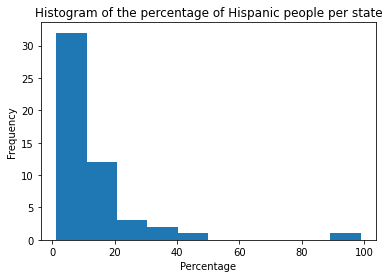

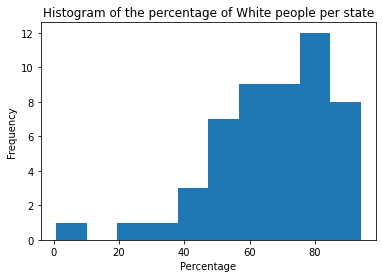

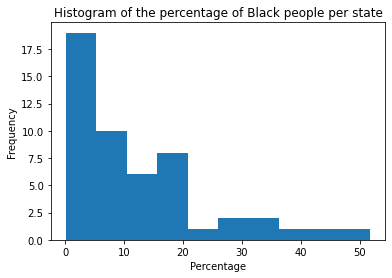

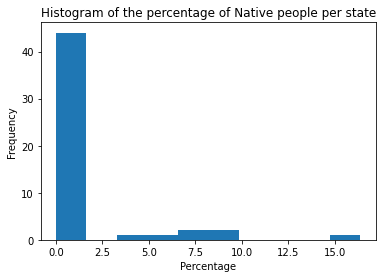

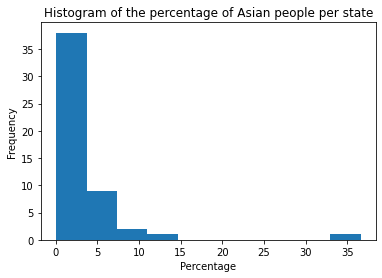

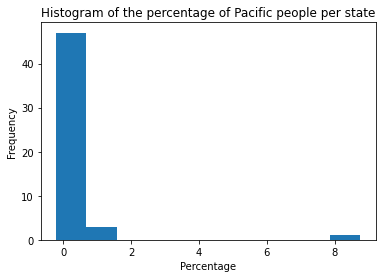

<Figure size 432x288 with 0 Axes>

In [38]:
for race in ['Hispanic','White', 'Black', 'Native', 'Asian', 'Pacific']:
    plt.hist(us_census[race])
    plt.title("Histogram of the percentage of {} people per state".format(race))
    plt.xlabel("Percentage")
    plt.ylabel("Frequency")
    plt.show()
    plt.clf()

## Get Creative

15. Phew. You've definitely impressed your boss on your first day of work.

    But is there a way you really convey the power of pandas and Python over the drudgery of `csv` and Excel?
    
    Try to make some more interesting graphs to show your boss, and the world! You may need to clean the data even more to do it, or the cleaning you have already done may give you the ease of manipulation you've been searching for.